<a href="https://colab.research.google.com/github/suhyun6363/what_your_personal_color/blob/kmeans_yeeun/%EC%BC%80%EC%9D%B4%EB%AF%BC%EC%A6%88~.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy matplotlib scikit-learn
!pip install imageio

In [ ]:
# 실루엣 계수.ver
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import imageio

# 얼굴 이미지는 여러 얼굴이 나타난 이미지여야 합니다.
# 실제 상황에서는 얼굴을 검출하고 해당 영역을 사용하는 것이 좋습니다.

# 예시로 사용할 이미지 로드 (사전에 적합한 이미지를 준비해야 합니다.)
image_path = "/content/face_only20.jpg"
face_image = imageio.imread(image_path)

# 이미지를 2D 배열로 변환
face_data = face_image.reshape((-1, 3))

# 표준화 (Standardization) - 평균이 0, 표준편차가 1이 되도록 스케일 조정
scaler = StandardScaler()
face_data_scaled = scaler.fit_transform(face_data)

# 최적의 클러스터 개수를 결정하기 위한 k 값 범위 설정
k_values = range(2, 5)

# 각 k 값에 대한 실루엣 스코어 저장
silhouette_scores = []

# k 값에 대한 k-means 클러스터링 수행 및 실루엣 스코어 계산
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(face_data_scaled)
    silhouette_avg = silhouette_score(face_data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# 실루엣 스코어를 플로팅하여 최적의 k 값 확인
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()

# 최적의 k 값 확인
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters (k): {optimal_k}')

# 최적의 k 값으로 k-means 클러스터링 수행
optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
optimal_cluster_labels = optimal_kmeans.fit_predict(face_data_scaled)

# 클러스터 결과 시각화 (이 예시에서는 3D 플로팅)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(face_data_scaled[:, 0], face_data_scaled[:, 1], face_data_scaled[:, 2], c=optimal_cluster_labels)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()


<ipython-input-4-7b122dd43b11>:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  face_image = imageio.imread(image_path)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: ignored

<ipython-input-5-acd44654a9eb>:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  face_image = imageio.imread(image_path)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the 

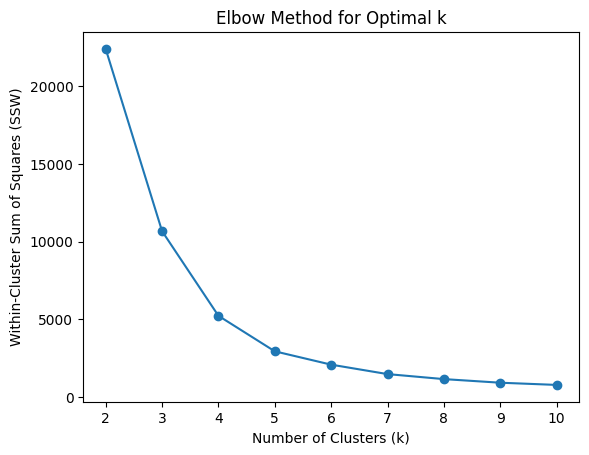

In [ ]:
# 엘보우.ver
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.preprocessing import StandardScaler
import imageio

# 얼굴 이미지는 여러 얼굴이 나타난 이미지여야 합니다.
# 실제 상황에서는 얼굴을 검출하고 해당 영역을 사용하는 것이 좋습니다.

# 예시로 사용할 이미지 로드 (사전에 적합한 이미지를 준비해야 합니다.)
image_path = "/content/face_only20.jpg"
face_image = imageio.imread(image_path)

# 이미지를 2D 배열로 변환
face_data = face_image.reshape((-1, 3))

# 표준화 (Standardization) - 평균이 0, 표준편차가 1이 되도록 스케일 조정
scaler = StandardScaler()
face_data_scaled = scaler.fit_transform(face_data)

# 최적의 클러스터 개수를 결정하기 위한 k 값 범위 설정
k_values = range(2, 11)

# 각 k 값에 대한 클러스터 내 제곱합(SSW) 저장
inertia_values = []

# k 값에 대한 k-means 클러스터링 수행 및 SSW 계산
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(face_data_scaled)
    inertia_values.append(kmeans.inertia_)

# SSW를 플로팅하여 엘보우 지점 확인
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (SSW)')
plt.title('Elbow Method for Optimal k')
plt.show()


In [ ]:
# 엘보우 지점 확인하여 최적의 k 값 결정
optimal_k = 3  # 여기서는 그래프를 보고 최적값을 수동으로 지정합니다.-> ??????
print(f'Optimal number of clusters (k): {optimal_k}')

# 최적의 k 값으로 k-means 클러스터링 수행
optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
optimal_cluster_labels = optimal_kmeans.fit_predict(face_data_scaled)

# 클러스터 결과 시각화 (이 예시에서는 3D 플로팅)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(face_data_scaled[:, 0], face_data_scaled[:, 1], face_data_scaled[:, 2], c=optimal_cluster_labels)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()
